In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('aluguel_duas_variaveis_sem_ruido.csv')

In [3]:
df.head()

,Area,Quartos,Preco
0,132,2,3940
1,136,5,4770
2,101,3,3570
3,218,1,5410
4,50,3,2550


In [4]:
df.describe()

,Area,Quartos,Preco
count,1000.000000,1000.000000,1000.000000
mean,165.139000,3.000000,4852.780000
std,77.313369,1.421978,1596.530859
min,30.000000,1.000000,1650.000000
25%,98.000000,2.000000,3580.000000
50%,166.000000,3.000000,4890.000000
75%,231.000000,4.000000,6180.000000
max,299.000000,5.000000,8030.000000


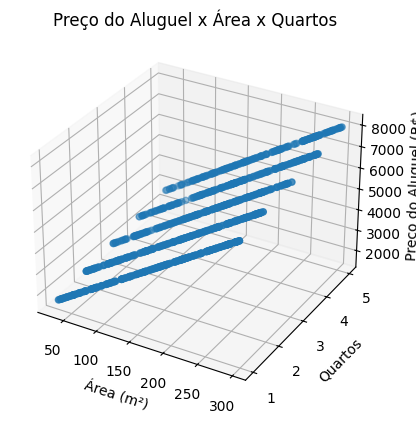

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Area'], df['Quartos'], df['Preco'])
ax.set_xlabel('Área (m²)')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço do Aluguel (R$)')
plt.title('Preço do Aluguel x Área x Quartos')
plt.show()

In [6]:
X = df[['Area', 'Quartos']]
y = df['Preco']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = modelo.predict(X_test)

In [10]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

R²: 1.00


In [13]:
mse = mean_squared_error(y_test, y_pred)
print(f"\nErro médio quadrático: {mse:.2f}")

print("\nCoeficientes do modelo:")
print(f"Intercept: {modelo.intercept_:.2f}")
print(f"Coeficientes: {modelo.coef_}")


Erro médio quadrático: 0.00

Coeficientes do modelo:
Intercept: 800.00
Coeficientes: [ 20. 250.]


In [14]:
print("\nModelo:")
print(f"Preço = {modelo.intercept_:.2f} + {modelo.coef_[0]:.2f}*Area + {modelo.coef_[1]:.2f}*Quartos")

print("\nErro médio quadrático:")
print(mse)


Modelo:
Preço = 800.00 + 20.00*Area + 250.00*Quartos

Erro médio quadrático:
4.053185001509836e-24
